In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nengo
%matplotlib inline

In [65]:
with open("data/final_run/paper5_reactions.txt", "r") as fi:
    lines = fi.readlines()

pre_rt = []

for line in lines:
    if line[:17] == 'Question answered':
        pre_rt.append(float(re.search("[0-9]+\.[0-9]+", line).group(0)))

In [66]:
pre_rt.insert(0, 0.0)
rt = np.diff(pre_rt)

In [67]:
# remove the outliers where the circuit failed
outliers = np.where(rt > 4.0)[0]
rt_filt = np.delete(rt, outliers)
print(outliers)

[30 41 95]


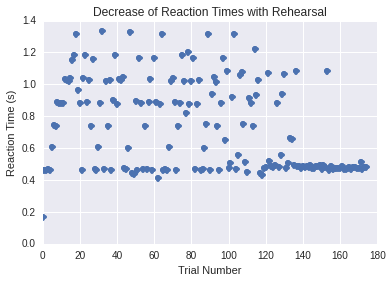

In [69]:
plt.plot(rt_filt[:175], linestyle="None", marker="o")
plt.title("Decrease of Reaction Times with Rehearsal")
plt.xlabel("Trial Number")
plt.ylabel("Reaction Time (s)")
plt.sav

In [3]:
# read from the far superior file
with open("data/final_run/paper5_react_time.txt", "r") as fi:
    lines = fi.readlines()
rt = np.array(lines, dtype=np.float64)
print(rt.dtype)

float64


In [4]:
fail = np.where(rt > 4.0)[0]
too_fast = np.where(rt < 0.3)[0]
outliers = np.concatenate((too_fast, fail))
rt_filt = np.delete(rt, outliers)
print(outliers)

[ 0 30 41 95]


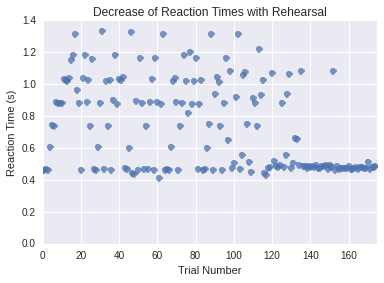

In [10]:
plt.plot(rt_filt[:175], linestyle="None", marker="o", alpha=0.75)
plt.title("Decrease of Reaction Times with Rehearsal")
plt.xlabel("Trial Number")
plt.ylabel("Reaction Time (s)")
plt.ylim(0.0, 1.4)
plt.xlim(0, 175)
plt.savefig("react_slow.pdf", format="pdf")